In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("archive/Ecommerce Customers.csv")

In [8]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


<AxesSubplot:>

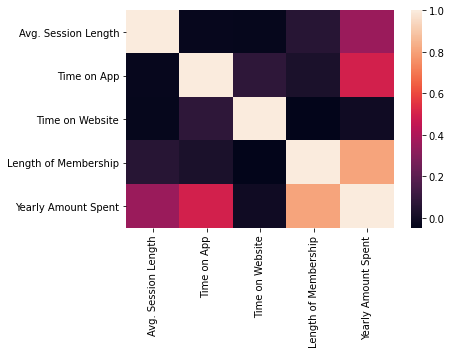

In [9]:
sns.heatmap(df.corr())

In [11]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


array([[<AxesSubplot:title={'center':'Avg. Session Length'}>,
        <AxesSubplot:title={'center':'Time on App'}>],
       [<AxesSubplot:title={'center':'Time on Website'}>,
        <AxesSubplot:title={'center':'Length of Membership'}>],
       [<AxesSubplot:title={'center':'Yearly Amount Spent'}>,
        <AxesSubplot:>]], dtype=object)

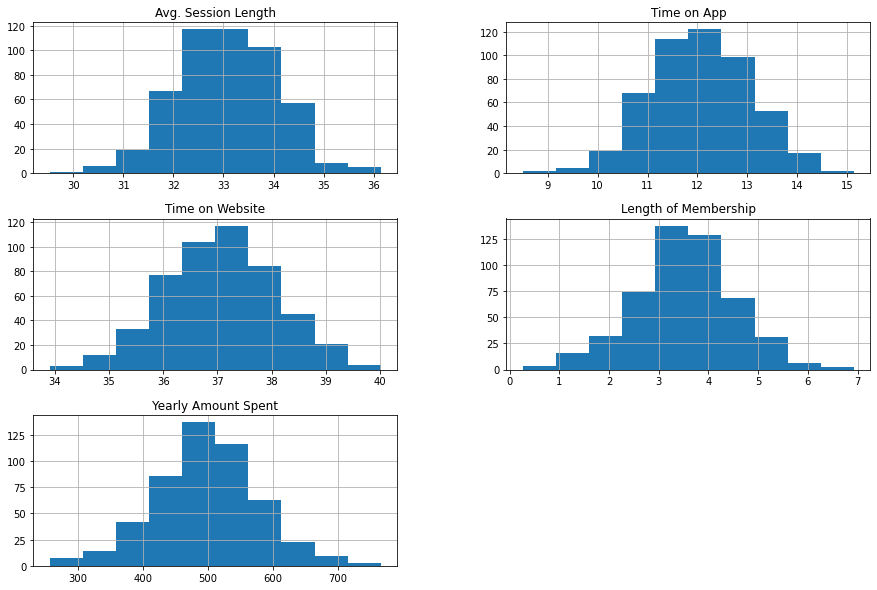

In [18]:

df.hist(figsize=(15,10))

Text(0.5, 1.0, 'Customers Spent by App')

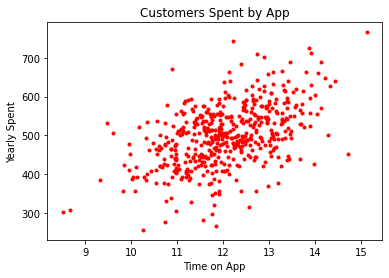

In [24]:

plt.scatter(df['Time on App'],df['Yearly Amount Spent'],marker='.',color='red')
plt.xlabel("Time on App")
plt.ylabel("Yearly Spent")
plt.title("Customers Spent by App")
# We observe an almost linear relation

Text(0.5, 1.0, 'Customers Spent by Website')

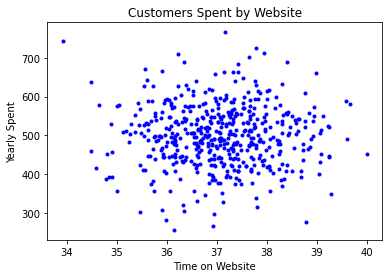

In [68]:
plt.scatter(df['Time on Website'],df['Yearly Amount Spent'],marker='.',color='blue')
plt.xlabel("Time on Website")
plt.ylabel("Yearly Spent")
plt.title("Customers Spent by Website")
# Distributed all over the place

Text(0.5, 1.0, 'Customers Spent by Avg. Session Len')

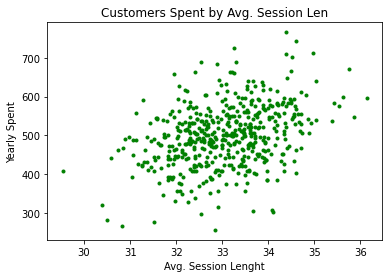

In [69]:
plt.scatter(df['Avg. Session Length'],df['Yearly Amount Spent'],marker='.',color='green')
plt.xlabel("Avg. Session Lenght")
plt.ylabel("Yearly Spent")
plt.title("Customers Spent by Avg. Session Len")
# Barely Linear, Almost Like Time on Website

Text(0.5, 1.0, 'Customers Spent by Len of Membership')

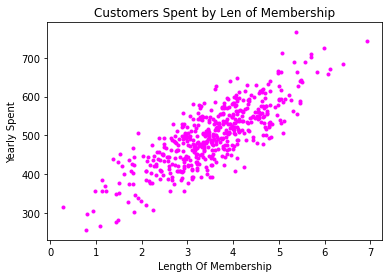

In [70]:
plt.scatter(df['Length of Membership'],df['Yearly Amount Spent'],marker='.',color='Magenta')
plt.xlabel("Length Of Membership")
plt.ylabel("Yearly Spent")
plt.title("Customers Spent by Len of Membership")
# Linear ! 

In [71]:
x=df[["Time on App","Length of Membership"]]
y=df['Yearly Amount Spent']

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=.3)

In [73]:
reg=LinearRegression()

In [74]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [75]:
reg.score(xtest,ytest)

0.8754871535362339

In [76]:
x=df[["Time on App","Length of Membership","Time on Website","Avg. Session Length"]]
y=df['Yearly Amount Spent']

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=.3)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
reg.score(xtest,ytest)

0.9837634793037408

In [78]:
reg.coef_

array([38.49891175, 61.22388809,  0.07906901, 25.64727341])

 # Lenght of Membership > Time on App > Avg. Session Length >> Time on Website

In [79]:
x=df[["Length of Membership"]]
y=df['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=.3)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
print(reg.score(xtest,ytest))
a=np.linspace(start=0,stop=7,num=100).reshape(-1,1)
# print(a)

0.6496052583773311


Text(0.5, 1.0, 'Linear Rel Len of Mem')

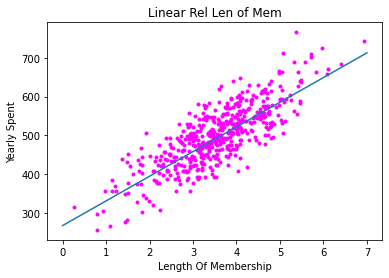

In [81]:

plt.plot(a,reg.predict(a))
plt.scatter(df['Length of Membership'],df['Yearly Amount Spent'],marker='.',color='Magenta')
plt.xlabel("Length Of Membership")
plt.ylabel("Yearly Spent")
plt.title("Linear Rel Len of Mem")

In [82]:
x=df[["Time on App"]]
y=df['Yearly Amount Spent']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=.3)
reg=LinearRegression()
reg.fit(xtrain,ytrain)
print(reg.score(xtest,ytest))
a=np.linspace(start=8,stop=16,num=100).reshape(-1,1)
# print(a)

0.2384804751627484


Text(0.5, 1.0, 'Linear Rel Time on App')

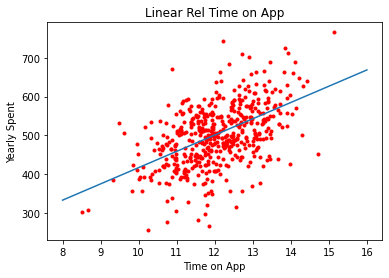

In [83]:
plt.plot(a,reg.predict(a))
plt.scatter(df['Time on App'],df['Yearly Amount Spent'],marker='.',color='Red')
plt.xlabel("Time on App")
plt.ylabel("Yearly Spent")
plt.title("Linear Rel Time on App")